# Program 1 Assignment <br>Marianne Strauss
**Marianne Strauss<br>CSCI 3412 - Algorithms**

# Introduction
This is a report implemention of a traversal of all known stars (assuming "we have a technology that lets us jump instantaneously between stars") within a certain radius with greedy method where you go from current star to the next nearest star but this may not result in a optimal/shortest path. Star data is retrieved from HYG Database, hygxyz.csv file.

# Design

1. Data will be read from csv file, hygxyz.csv, and then converted to a Pandas Dataframe to be used to graph results.
2. Dataframe of star data is then copied to a Dictionary for access by algorithm.
2. Required methods are as follows:
     - __distance_calc__ - A method to calculate distance between two Points in three dimensions. With the equation: $sqrt((x2-x1)^2+(y2-y1)^2+(z2-z1)^2)$
     - __within_range__ - A method to take the star dictionary for x, y, z values and a range (float type, also in parsecs) that returns a list of all stars within that distance range from Sol calculated by calling distance_calc method.
     - __getName__ - A method to retrieve/construct a name (string) from dictionary of star data. The name will be constructed from first 'PoperName' if available, if not that then the star's 'BayerFlamsteed', if not that then the star's 'Gliese',  and if that is not available then star will be 'Unnamed' and the StarID, HD, and HR will be provided.
     - __traverse__ - A method to traverse stars within a provided range from Sol using greedy algorithm. This is done by generating a list based on range provided and calling within_range method. Implementation of greedy algorithm is: starting at Sol, traverse to nearest star by calculating the distance of all stars in list within range, display the travel and displaying distance and total distance travelled, then taking the star within the shortest distance place in list of visited stars and popping from within_range list and so on through entired list of stars within the range.

# Implementation

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [2]:

data = pd.read_csv("hygxyz.csv", index_col ="StarID")
pd.set_option('display.float_format', lambda x: '%.9f' % x)
data

,HIP,HD,HR,Gliese,BayerFlamsteed,ProperName,RA,Dec,Distance,PMRA,...,Mag,AbsMag,Spectrum,ColorIndex,X,Y,Z,VX,VY,VZ
StarID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,Sol,0.000000000,0.000000000,0.000004848,0.000000000,...,-26.730000000,4.850000000,G2V,0.656000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
1,1.000000000,224700.000000000,NaN,NaN,NaN,NaN,0.000060790,1.089013320,282.485875706,-5.200000000,...,9.100000000,1.845016310,F5,0.482000000,282.434850000,0.004490000,5.368840000,0.000000049,-0.000007120,-0.000002574
2,2.000000000,224690.000000000,NaN,NaN,NaN,NaN,0.000253150,-19.498837450,45.662100457,181.210000000,...,9.270000000,5.972220574,K3V,0.999000000,43.043290000,0.002850000,-15.241440000,-0.000000071,0.000040112,-0.000000194
3,3.000000000,224699.000000000,NaN,NaN,NaN,NaN,0.000333860,38.859286080,355.871886121,5.240000000,...,6.610000000,-1.146468400,B9,-0.019000000,277.113580000,0.024220000,223.277530000,0.000003148,0.000009040,-0.000003909
4,4.000000000,224707.000000000,NaN,NaN,NaN,NaN,0.000558780,-51.893546120,129.032258065,62.850000000,...,8.060000000,2.506508513,F0V,0.370000000,79.628960000,0.011640000,-101.531030000,0.000000072,0.000039313,0.000000061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119612,0.000000000,NaN,NaN,NN 4381,NaN,NaN,23.964046091,38.631649795,16.949152542,-162.634000000,...,12.640000000,11.494260058,m,NaN,13.239680000,-0.124620000,10.581540000,0.000008216,-0.000013440,-0.000010438
119613,0.000000000,NaN,NaN,NN 4385,NaN,NaN,23.995766572,47.765020885,16.722408027,864.678000000,...,16.100000000,14.983505920,m,1.870000000,11.240330000,-0.012450000,12.381170000,0.000012729,0.000070081,-0.000011485
119614,0.000000000,NaN,NaN,NN 4386,NaN,NaN,23.996235526,-44.071645775,18.518518519,-18.834000000,...,12.820000000,11.481968799,M7,1.640000000,13.305000000,-0.013110000,-12.880690000,0.000016816,-0.000001707,0.000017372


In [3]:
#converting dataframe to dictionary
data = data.fillna('None')

starDict = data.stack().groupby(level = 0).apply(list).to_dict()


In [4]:
def distance_calc(x1, x2, y1, y2, z1, z2):
    distance = 0.0
    distance = (x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2
    distance = math.sqrt(distance)
    return distance

#test
dTest = 0.0
dTest = distance_calc(0.0, -0.47175, 0.0, -0.36132, 0.0, -1.15037)
print(dTest)

1.2947784914030662


In [5]:
def within_range(a, b, r):
    for i in range(1, len(a)):
        if (distance_calc(0.0, float(a[i][16]), 
                          0.0, float(a[i][17]), 
                          0.0, float(a[i][18])) <= r):
            b.append(i)
    return b

In [6]:
def getName(a, starIDNum):
    name =''
    
    if a[starIDNum][5] == 'None':
        if a[starIDNum][4] == 'None':
            if a[starIDNum][3] == 'None':
                name = "Unnamed Star: StarID: " 
                + str(starIDNum) + ", HIP: " 
                + str(a[starIDNum][0]) + ", HD: " 
                + str(a[starIDNum][1]) + ", 
                HR: " + str(a[starIDNum][2]) 
                return name
            else:
                name = "Gliese " + a[starIDNum][3] 
                return name
        else:
            name = a[starIDNum][4] 
            return name
    else:
        name = a[starIDNum][5]
        return name
    
    return 'error'

In [7]:
def traverse(a, results, solRange):
    inRangeList = []
    
    #creates a list of stars within range from sol
    inRangeList = within_range(a, inRangeList, solRange)
    
    print('Found '+ str(len(inRangeList)) 
          + ' stars within a radius of ' 
          + str(solRange) + 
          ' parsecs from Sol. (not including Sol)')
    
    #starting Greedy search and traversal
    
    print('Computing a star traversal using a greedy method.')
    
    alreadyVisted = []
    currentStarID = 0
    distance = 0.0
    totalDistance = 0.0
    
    while (len(inRangeList)!= 0):
        #add already visted stars to list of record of travel
        results.append(currentStarID)
        
        #calculate where to go next
        d = 10000000.0
        nearestStarID = 0
        
        for i in range(0, len(inRangeList)):
            distanceCheck = 0.0
            distanceCheck = distance_calc((a[currentStarID][16]), 
                                          (a[inRangeList[i]][16]), 
                                          (a[currentStarID][17]), 
                                          (a[inRangeList[i]][17]), 
                                          (a[currentStarID][18]), 
                                          (a[inRangeList[i]][18]))
            
            if( distanceCheck < d):
                d = distanceCheck
                distance = distanceCheck
                nearestStarID = inRangeList[i]
                
        # travel to nearest star
        currentName = getName(a, currentStarID)
        nextName = getName(a, nearestStarID)
        totalDistance += distance

        print('..' + currentName + " -> " + nextName 
              + ' : distance = ' + str(round(distance, 2)) 
              + ', total distance = ' + str(round(totalDistance, 2)))
        
        alreadyVisted.append(nearestStarID)
        inRangeList.remove(nearestStarID)
        currentStarID = nearestStarID
        
    return results
    

In [8]:
#running traverse() with range = 10.0 parsecs
travelRange = 10.0 #in parsec
recordOfTravel = []

recordOfTravel = traverse(starDict, recordOfTravel, travelRange)

Found 326 stars within a radius of 10.0 parsecs from Sol. (not including Sol)
Computing a star traversal using a greedy method.
..Sol -> Proxima Centauri : distance = 1.29, total distance = 1.29
..Proxima Centauri -> Rigel Kentaurus B : distance = 0.07, total distance = 1.37
..Rigel Kentaurus B -> Rigel Kentaurus A : distance = 0.0, total distance = 1.37
..Rigel Kentaurus A -> Barnard's Star : distance = 1.98, total distance = 3.35
..Barnard's Star -> Gliese Gl 729 : distance = 1.7, total distance = 5.05
..Gliese Gl 729 -> Lacaille 8760 : distance = 2.26, total distance = 7.31
..Lacaille 8760 -> Gliese Gl 832 : distance = 1.28, total distance = 8.59
..Gliese Gl 832 -> Eps Ind : distance = 1.47, total distance = 10.06
..Eps Ind -> Lacaille 9352 : distance = 1.44, total distance = 11.5
..Lacaille 9352 -> Gliese Gl 866  A : distance = 1.25, total distance = 12.75
..Gliese Gl 866  A -> Unnamed Star: StarID: 113751, HIP: 114110.0, HD: None, HR: None : distance = 1.31, total distance = 14.05

# Results

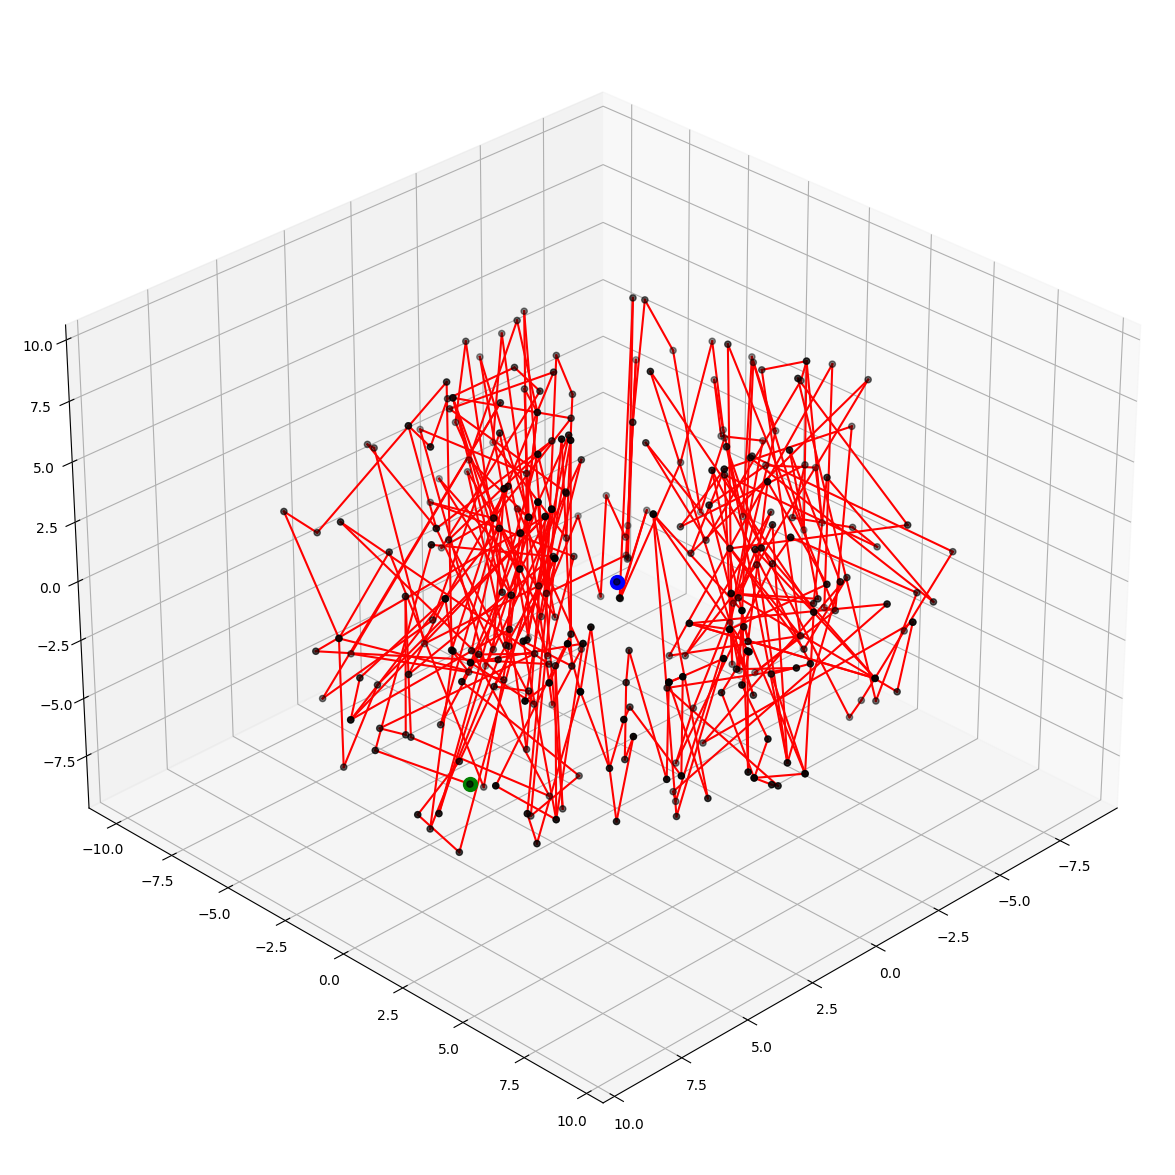

In [9]:
df_filtered = data.loc[data.index.isin(recordOfTravel)].reset_index()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_filtered['X'], df_filtered['Y'], df_filtered['Z'], color='black')

ax.scatter(df_filtered['X'][0], df_filtered['Y'][0], df_filtered['Z'][0], color='blue', s=100)
ax.scatter(df_filtered['X'].iloc[-1], df_filtered['Y'].iloc[-1], df_filtered['Z'].iloc[-1], color='green', s=100)

for i in range(1, len(df_filtered)-1):
    ax.plot([df_filtered['X'][i], df_filtered['X'][i+1]], [df_filtered['Y'][i], df_filtered['Y'][i+1]], 
            [df_filtered['Z'][i], df_filtered['Z'][i+1]], color='red')

ax.view_init(elev=30, azim=45)

plt.show()




In the above plot the starting point(Sol) is colored blue and the ending point is colored green. Using this greedy method it is evident that the most optimal/shortest path by definition of a greedy algorithm is not achieved. Because it only considers the nearest star of the current star (locally optimal) but doesnt take in consideration the entiriety of the set of Stars.

# Conclusion

With the parameters of instant travel and a range of 10.0 parsecs this may be a reasonable solution but for larger ranges and if considering more realistic parameters a more optimal approach may be needed. This is difficult because this is basically the "Traveling Salesman Problem" and is therefore NP-Hard. With this in mind I can conclude that the current method and results are acceptable for current parameters and constraints.

# Sources

Wikipedia contributors. "Euclidean distance." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 9 Apr. 2023. Web. 14 Apr. 2023.

"3D Scatter Plot - Matplotlib - Scaler." Scaler, n.d. https://www.scaler.com/topics/matplotlib/3d-scatter-plot-matplotlib/.